# Import necessary library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read data

In [3]:
df = pd.read_excel('./Desktop/dataset_python/sales_overview.xlsx')
df.head(5)

,CustomerKey,SalesOrderNumber,ProductName,ProductSubcategoryName,ProductCategory,Color,Size,SalesOrderLineNumber,OrderQuantity,UnitPrice,TotalProductCost,TaxAmount,SalesAmount,OrderDate,SalesTerritoryRegion,SalesTerritoryCountry,SalesTerritoryGroup,FirstPurchaseYear
0,17956,SO43796,"Road-650 Black, 52",Road Bikes,Bikes,Black,52,1,1,699.10,413.15,55.9279,699,2011-01-20,France,France,Europe,2011
1,12373,SO45006,"Road-150 Red, 48",Road Bikes,Bikes,Red,48,1,1,3578.27,2171.29,286.2616,3578,2011-06-27,France,France,Europe,2011
2,12849,SO46209,"Road-150 Red, 48",Road Bikes,Bikes,Red,48,1,1,3578.27,2171.29,286.2616,3578,2011-11-11,France,France,Europe,2011
3,28393,SO43834,"Mountain-100 Black, 38",Mountain Bikes,Bikes,Black,38,1,1,3374.99,1898.09,269.9992,3375,2011-01-27,France,France,Europe,2011
4,18039,SO45627,"Road-650 Red, 62",Road Bikes,Bikes,Red,62,1,1,699.10,413.15,55.9279,699,2011-09-04,France,France,Europe,2011


# Additional column

In [34]:
## Add year column
df['Year'] = pd.DatetimeIndex(df['OrderDate']).year
df['Year'] = df['Year'].values.astype('int32')

## Add month column
df['Month'] = pd.DatetimeIndex(df['OrderDate']).month
df['Month'] = df['Month'].values.astype('int32')


# 1. SALES ANALYSIS

# Revenue by period

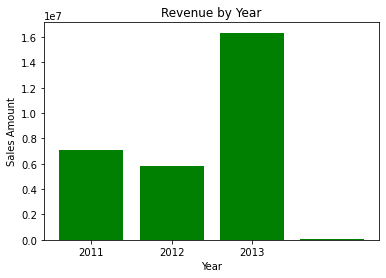

In [35]:
#Revenue by year
sales_by_year = df.groupby(['Year']).sum()
years = range(2011, 2015)
fig, ax= plt.subplots()
ax.bar(years, sales_by_year['SalesAmount'], color='green',)
ax.set_xticks(ticks=np.arange(2011, 2014))
ax.set_xlabel('Year')
ax.set_ylabel('Sales Amount')
ax.set_title('Revenue by Year');


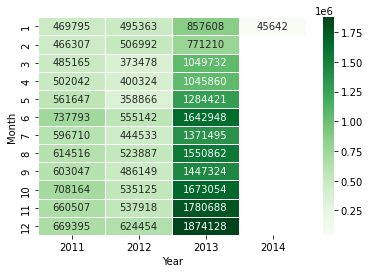

In [36]:
#Revenue by month
sales_by_month = pd.pivot_table(df, index='Month', columns='Year', values='SalesAmount', aggfunc=np.sum)
sns.heatmap(data=sales_by_month, cmap='Greens', linecolor='white', linewidth=1, annot= True, fmt='.0f');


In [20]:
# Revenue percentage change by period
df['InvoiceYearMonth']=df['OrderDate'].map(lambda date: 100*date.year+date.month)
Revenue= df.groupby(['InvoiceYearMonth'])['SalesAmount'].sum().reset_index()
Revenue['MonthlyGrowth'] = Revenue['SalesAmount'].pct_change()
Revenue.head()

,InvoiceYearMonth,SalesAmount,MonthlyGrowth
0,201101,469795,NaN
1,201102,466307,-0.007425
2,201103,485165,0.040441
3,201104,502042,0.034786
4,201105,561647,0.118725


# Revenue by regions

In [21]:
#Revenue by regions
sales_by_country = df.groupby(['SalesTerritoryCountry']).sum()
sales_by_group = df.groupby(['SalesTerritoryGroup']).sum()

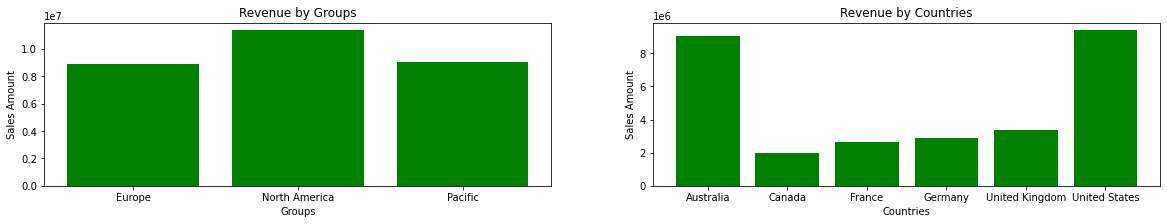

In [22]:
countries = [country for country, df in df.groupby('SalesTerritoryCountry')]
groups = [group for group, df in df.groupby('SalesTerritoryGroup')]
fig, (ax1, ax2)= plt.subplots (nrows= 1, ncols=2, figsize=(20,3))

ax1.bar(groups, sales_by_group['SalesAmount'], color='green')
ax1.set_xlabel('Groups')
ax1.set_ylabel('Sales Amount')
ax1.set_title('Revenue by Groups')

ax2.bar(countries, sales_by_country['SalesAmount'], color='green')
ax2.set_xlabel('Countries')
ax2.set_ylabel('Sales Amount')
ax2.set_title('Revenue by Countries');

# Product sold most

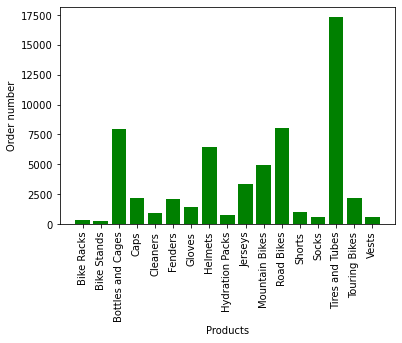

In [38]:
#Products by order quantity
product_group = df.groupby('ProductSubcategoryName')
quantity_order = product_group.sum()['OrderQuantity']
products = [product for product, df in product_group]
plt.bar(products, quantity_order, color = 'g')
plt.xticks(products, rotation = 'vertical', size = 10)
plt.xlabel('Products')
plt.ylabel('Order number');

C:\Users\Admin\AppData\Local\Temp/ipykernel_18756/1074819103.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = 'vertical', size = 10);


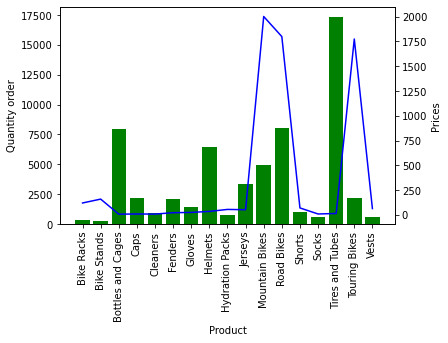

In [51]:
#Order quantity vs prices
prices = df.groupby('ProductSubcategoryName').mean()['UnitPrice']
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, quantity_order, color = 'g')
ax2.plot(products, prices, 'b-')
ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity order')
ax2.set_ylabel('Prices')
ax1.set_xticklabels(products, rotation = 'vertical', size = 10);

# 2. MARKETING ANALYSIS

# Monthly customer

In [41]:
df_monthly_customer= df.groupby(['InvoiceYearMonth'])['CustomerKey'].nunique().reset_index()
df_monthly_customer.head(5)

,InvoiceYearMonth,CustomerKey
0,201101,144
1,201102,144
2,201103,150
3,201104,157
4,201105,174


# Monthly growth

In [42]:
df_monthly_revenue= df.groupby(['InvoiceYearMonth'])['SalesAmount'].sum().reset_index()
df_monthly_revenue['MonthlyGrowth'] = df_monthly_revenue['SalesAmount'].pct_change()
df_monthly_revenue.head(5)

,InvoiceYearMonth,SalesAmount,MonthlyGrowth
0,201101,469795,NaN
1,201102,466307,-0.007425
2,201103,485165,0.040441
3,201104,502042,0.034786
4,201105,561647,0.118725


# Monthly Orders

In [43]:
df_monthly_order = df.groupby(['InvoiceYearMonth'])['SalesOrderNumber'].nunique().reset_index()
df_monthly_order.head(5)

,InvoiceYearMonth,SalesOrderNumber
0,201101,144
1,201102,144
2,201103,150
3,201104,157
4,201105,174


# Customer ratio

In [52]:
df['CustomerType'] = 'New'
df.loc[df['Year'] > df['FirstPurchaseYear'], 'CustomerType'] = 'Existing'
df_customer_type_revenue = df.groupby(['Year', 'CustomerType'])['SalesAmount'].sum().reset_index()
df_customer_type_revenue

,Year,CustomerType,SalesAmount
0,2011,New,7075088
1,2012,Existing,60955
2,2012,New,5781276
3,2013,Existing,10459953
4,2013,New,5889377
5,2014,Existing,19593
6,2014,New,26049


# 3.CUSTOMER ANALYSIS

# Recency

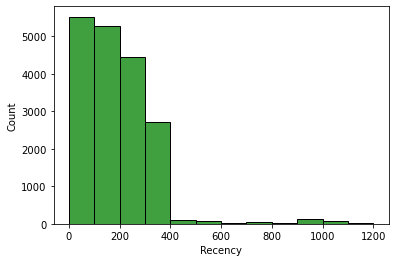

In [47]:
customer_purchase= df.groupby('CustomerKey')['OrderDate'].max().reset_index()
customer_purchase.columns=['CustomerKey', 'RecentlyDate']
customer_purchase['Recency']= (customer_purchase['RecentlyDate'].max() - customer_purchase['RecentlyDate']).dt.days

sns.histplot(data=customer_purchase['Recency'], binwidth=100, color='g');

# Frequency

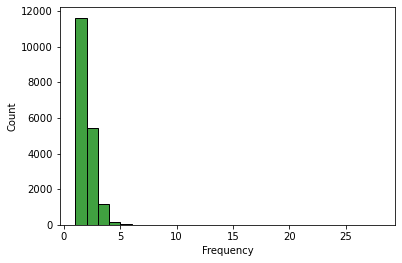

In [48]:
purchase_frequency= df.groupby('CustomerKey')['SalesOrderNumber'].nunique().reset_index()
purchase_frequency.columns = ['CustomerKey', 'Frequency']
sns.histplot(data=purchase_frequency['Frequency'], binwidth=1, color='g');

# Monetary value

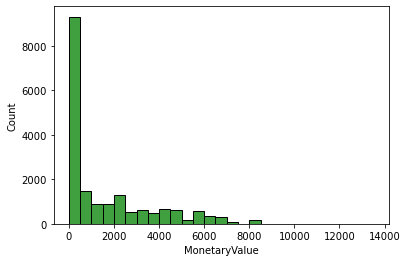

In [49]:
customer_value=df.groupby('CustomerKey')['SalesAmount'].sum().reset_index()
customer_value.columns=['CustomerKey', 'MonetaryValue']
sns.histplot(data=customer_value['MonetaryValue'], binwidth=500, color='g');


In [50]:
df_customer = pd.merge(purchase_frequency, customer_purchase, on = 'CustomerKey')
df_customer_new = pd.merge(df_customer, customer_value, on = 'CustomerKey')
df_customer_segmentation = df_customer_new.drop(columns=['RecentlyDate'])
df_customer_segmentation.head(5)

,CustomerKey,Frequency,Recency,MonetaryValue
0,11000,3,270,8249
1,11001,3,49,6384
2,11002,3,339,8114
3,11003,2,263,4739
4,11004,3,272,8196


In [26]:
df_customer_segmentation.to_csv('customer_segmentation.csv')